# Importing initial Library


In [1]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from tqdm import tqdm


# Data loading and intial cleaning

In [2]:
seed = 7
num_trees= 100
max_features = 3
rng = RandomState(seed)
df = pd.read_csv('preprocessed_Bar_Wn.csv')
df1=df
X1, y1 = df.iloc[:, :-1], df.iloc[:, -1]
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df = imputer.fit_transform(df)
df=pd.DataFrame(df)
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(1180, 57) (1180,)


# Splitting The data

In [3]:

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=seed)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (944, 57) (944,)
Test set:  (236, 57) (236,)


# Ensuring imputation

In [4]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Importing All model Building Library

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Defining the Model

In [6]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
sv = SVC(kernel='rbf', C=15.0)

gnb = GaussianNB()

kfold = KFold(n_splits=10)
KNN = KNeighborsClassifier()

BC=BaggingClassifier(base_estimator=dt, n_estimators=num_trees, random_state=seed)

EC=ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

ADC=AdaBoostClassifier(n_estimators=num_trees, random_state=seed) 

GBC=GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)

LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')

BCR=BaggingClassifier(base_estimator=rf, n_estimators=num_trees, random_state=seed)

mnb=MultinomialNB()

# Fitting the Model

In [7]:
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
sv.fit(X_train, y_train)
gnb.fit(X_train, y_train)
KNN.fit(X_train, y_train)
BC.fit(X_train, y_train)
EC.fit(X_train, y_train)
ADC.fit(X_train, y_train)
GBC.fit(X_train, y_train)
LR.fit(X_train, y_train)
BCR.fit(X_train, y_train)
mnb.fit(X_train, y_train)

MultinomialNB()

# Predicting the Value

In [8]:
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gnb_pred = gnb.predict(X_test)
KNN_pred = KNN.predict(X_test)
BC_pred = BC.predict(X_test)
EC_pred = EC.predict(X_test)
ADC_pred = ADC.predict(X_test)
GBC_pred = GBC.predict(X_test)
LR_pred = LR.predict(X_test)
BCR_pred = BCR.predict(X_test)
mnb_pred = mnb.predict(X_test)

# Getting Accuracy and AUC

In [9]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix

dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
sv_acc = accuracy_score(y_test, sv_pred)
gnb_acc = accuracy_score(y_test, gnb_pred)
KNN_acc = accuracy_score(y_test, KNN_pred)
BC_acc = accuracy_score(y_test, BC_pred)
EC_acc = accuracy_score(y_test, EC_pred)
ADC_acc = accuracy_score(y_test, ADC_pred)
GBC_acc = accuracy_score(y_test, GBC_pred)
LR_acc = accuracy_score(y_test, LR_pred)
BCR_acc = accuracy_score(y_test, BCR_pred)
mnb_acc = accuracy_score(y_test, mnb_pred)

In [10]:
dt_auc = roc_auc_score(y_test, dt_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
sv_auc = roc_auc_score(y_test, sv_pred)
gnb_auc = roc_auc_score(y_test, gnb_pred)
KNN_auc = roc_auc_score(y_test, KNN_pred)
BC_auc = roc_auc_score(y_test, BC_pred)
EC_auc = roc_auc_score(y_test, EC_pred)
ADC_auc = roc_auc_score(y_test, ADC_pred)
GBC_auc = roc_auc_score(y_test, GBC_pred)
LR_auc = roc_auc_score(y_test, LR_pred)
BCR_auc = roc_auc_score(y_test, BCR_pred)
mnb_auc = roc_auc_score(y_test, mnb_pred)

In [11]:
print('Decision tree acc: %.6f' % dt_acc)
print('Random forest acc: %.6f' % rf_acc)
print('SVM acc: %.6f' % sv_acc)
print('Nabive Baise acc: %.6f' % gnb_acc)
print('KNN: %.6f' % KNN_acc)
print('BAGGING: %.6f' % BC_acc)
print('Extra tree: %.6f' % EC_acc)
print('ADC Boosting: %.6f' % ADC_acc)
print('GDC Boosting: %.6f' % GBC_acc)
print('Logistic: %.6f' % LR_acc)
print('BAGGING Random Forest: %.6f' % BCR_acc)
print('multinomial: %.6f' % mnb_acc)
print()
print('Decision tree AUC: %.6f' % dt_auc)
print('Random forest AUC: %.6f' % rf_auc)
print('SVM AUC: %.6f' % sv_auc)
print('gnb AUC: %.6f' % gnb_auc)
print('KNN AUC: %.6f' % KNN_auc)
print('Bagging AUC: %.6f' % BC_auc)
print('Extra tree AUC: %.6f' % EC_auc)
print('ADC Boosting: %.6f' % ADC_auc)
print('GDC Boosting: %.6f' % GBC_auc)
print('Logistic: %.6f' % LR_auc)
print('BAGGING Random Forest: %.6f' % BCR_auc)
print('multinomial: %.6f' % mnb_auc)

Decision tree acc: 0.644068
Random forest acc: 0.707627
SVM acc: 0.690678
Nabive Baise acc: 0.622881
KNN: 0.673729
BAGGING: 0.669492
Extra tree: 0.690678
ADC Boosting: 0.737288
GDC Boosting: 0.716102
Logistic: 0.677966
BAGGING Random Forest: 0.737288
multinomial: 0.635593

Decision tree AUC: 0.607506
Random forest AUC: 0.681710
SVM AUC: 0.665764
gnb AUC: 0.561485
KNN AUC: 0.662278
Bagging AUC: 0.630646
Extra tree AUC: 0.668879
ADC Boosting: 0.711563
GDC Boosting: 0.688905
Logistic: 0.644070
BAGGING Random Forest: 0.705333
multinomial: 0.611214


# Plotting Confusion Matrix

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:111: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


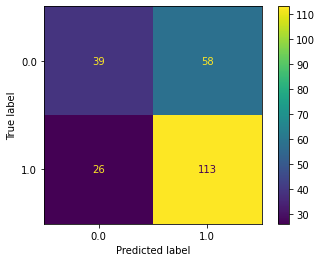

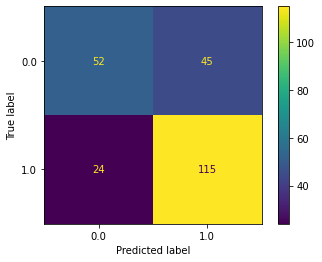

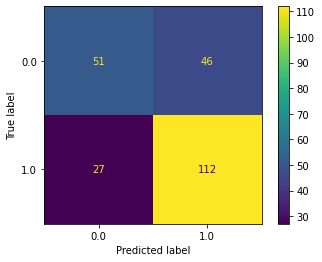

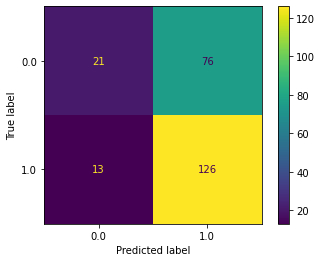

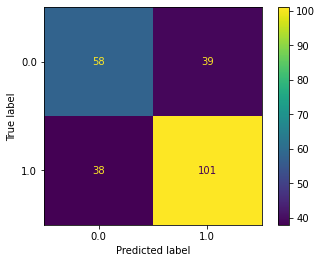

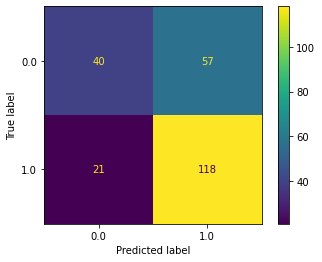

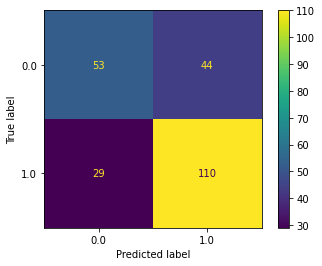

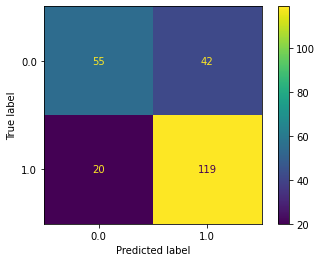

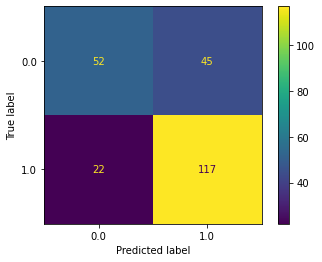

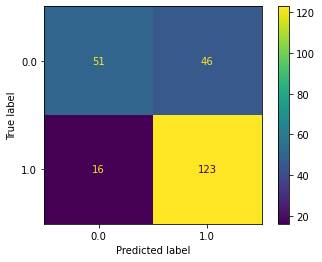

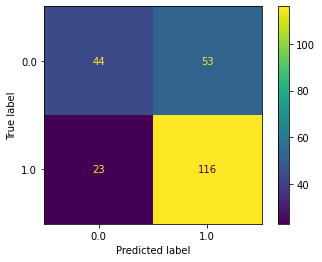

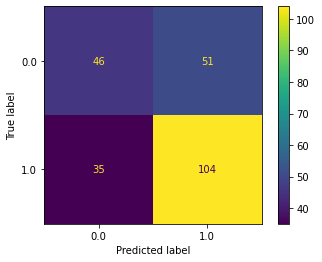

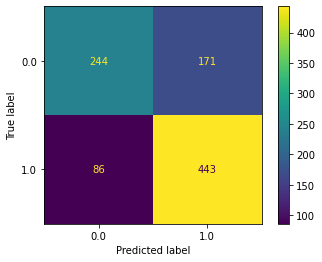

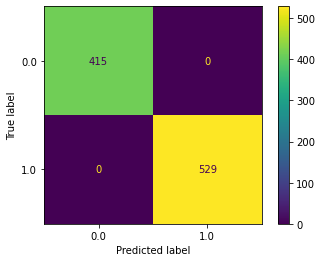

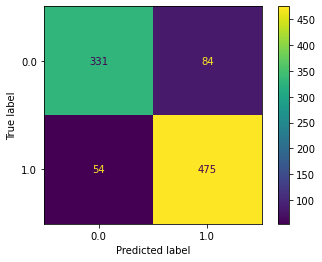

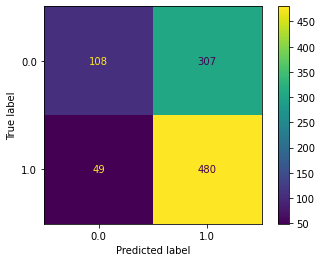

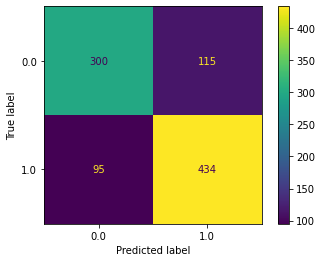

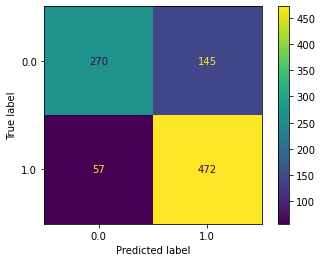

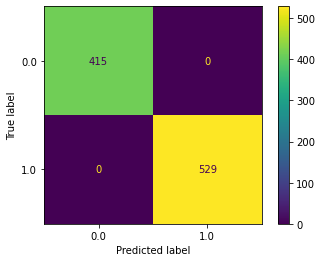

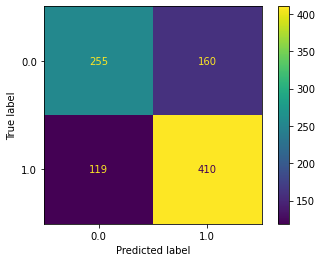

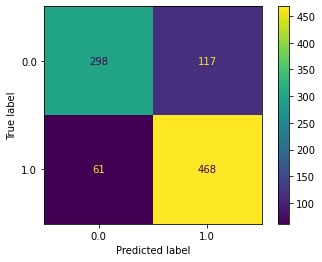

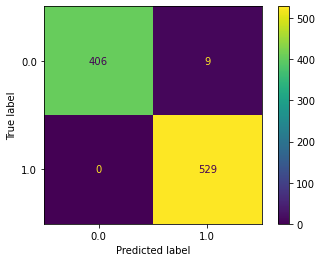

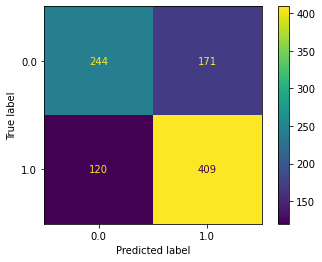

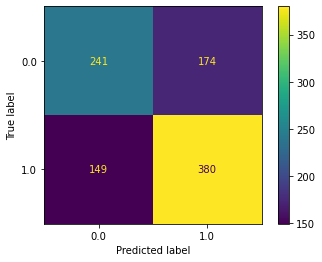

In [12]:

p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p4=plot_confusion_matrix(gnb, X_test, y_test)
p5=plot_confusion_matrix(KNN, X_test, y_test)
p6=plot_confusion_matrix(BC, X_test, y_test)
p7=plot_confusion_matrix(EC, X_test, y_test)
p8=plot_confusion_matrix(ADC, X_test, y_test)
p9=plot_confusion_matrix(GBC, X_test, y_test)
p10=plot_confusion_matrix(BCR, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)
p12=plot_confusion_matrix(mnb, X_test, y_test)

p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p16=plot_confusion_matrix(gnb, X_train, y_train)
p17=plot_confusion_matrix(KNN, X_train, y_train)
p18=plot_confusion_matrix(BC, X_train, y_train)
p19=plot_confusion_matrix(EC, X_train, y_train)
p20=plot_confusion_matrix(ADC, X_train, y_train)
p21=plot_confusion_matrix(GBC, X_train, y_train)
p22=plot_confusion_matrix(BCR, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)
p24=plot_confusion_matrix(mnb, X_train, y_train)

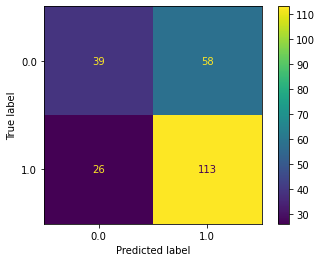

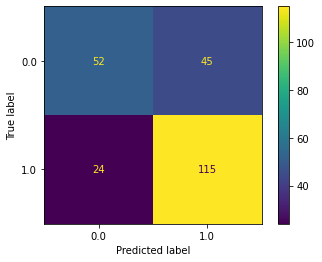

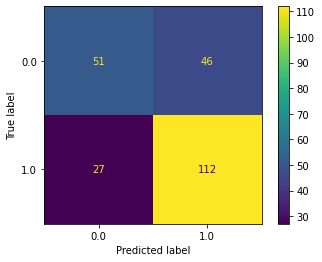

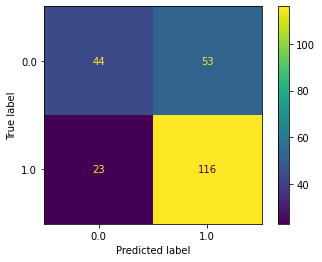

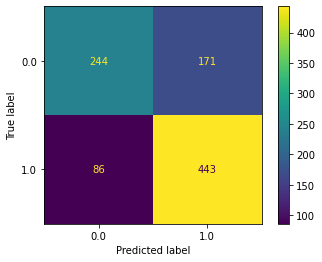

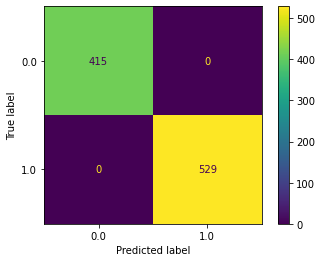

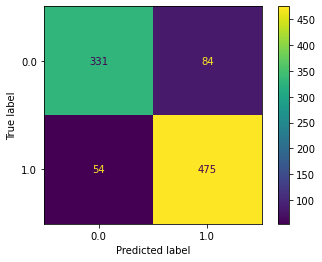

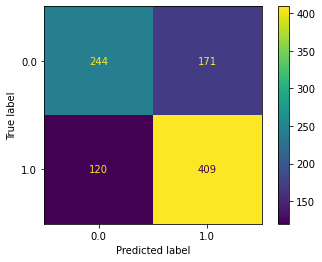

In [13]:
p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)

p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)

# Plotting Decision Tree

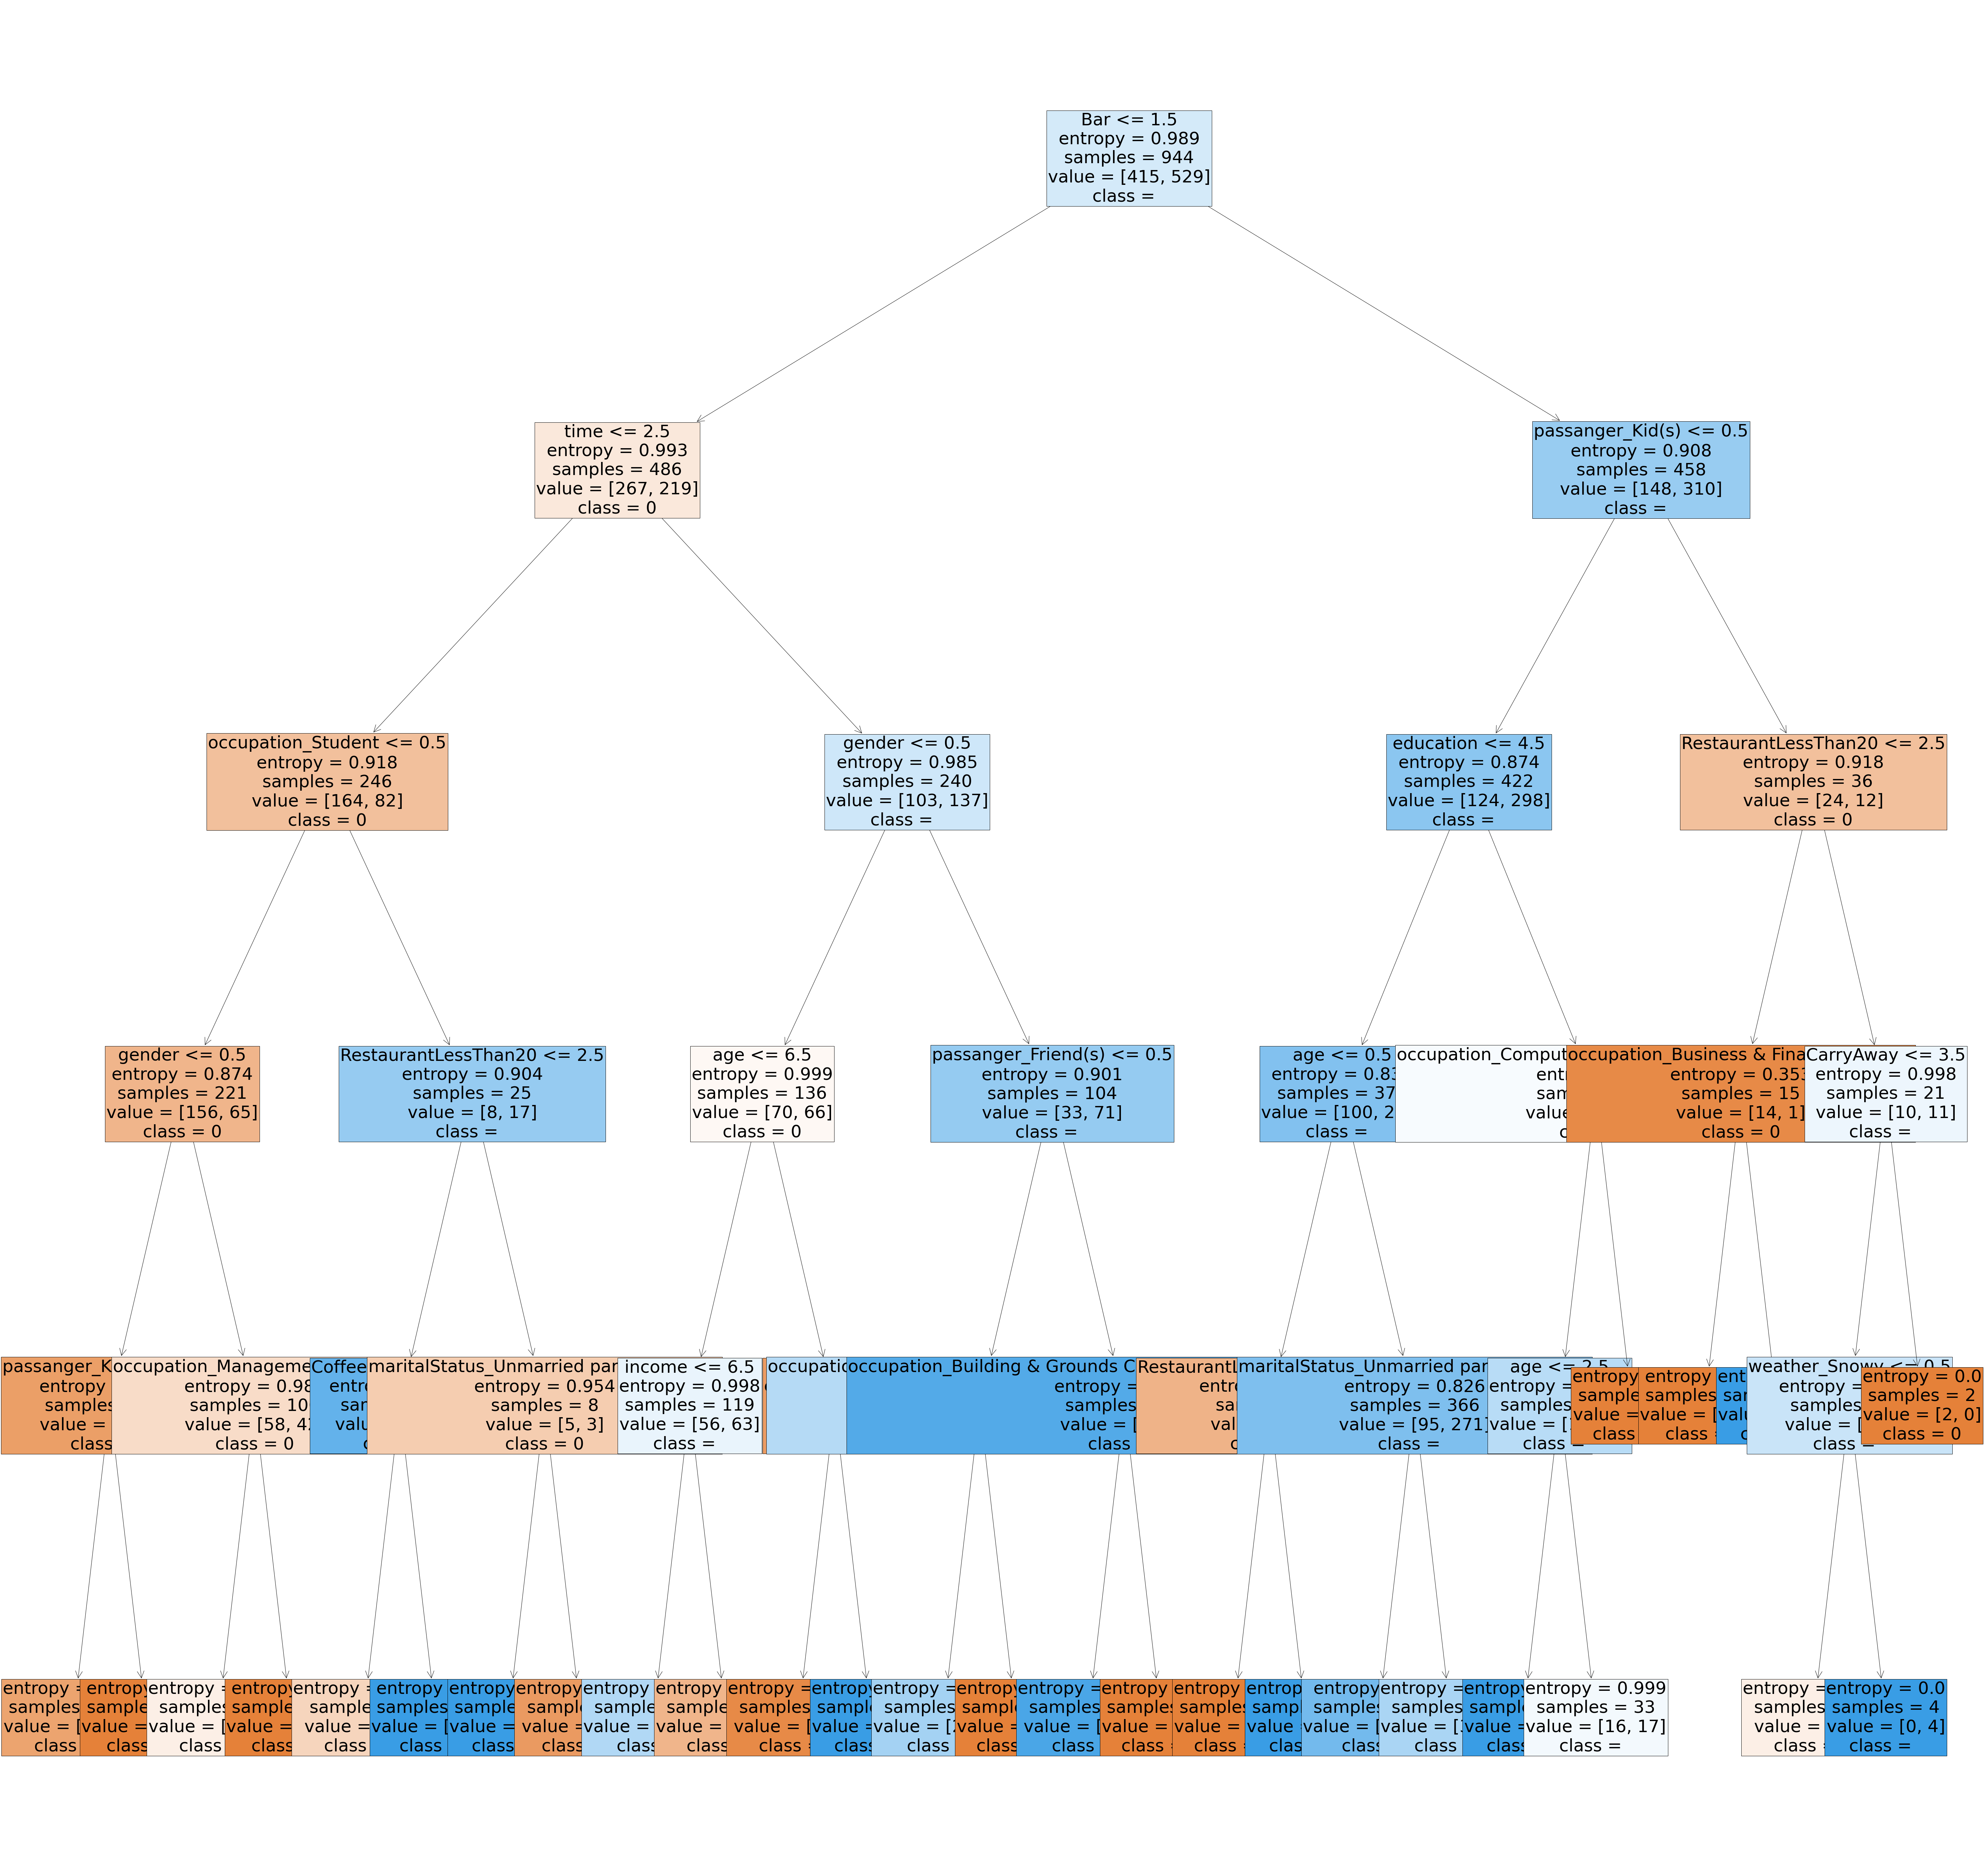

In [14]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(100,100))
fn=np.array(X1.columns)

cn=str(y1)
treee = tree.plot_tree(dt, fontsize=50,feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('dt_individualtree_Bar_Wn.png')


# Validating the Training set Accuracy

In [15]:

dt_pred1 = dt.predict(X_train)
rf_pred1 = rf.predict(X_train)
sv_pred1 = sv.predict(X_train)
gnb_pred1 = gnb.predict(X_train)
KNN_pred1= KNN.predict(X_train)
BC_pred1 = BC.predict(X_train)
EC_pred1 = EC.predict(X_train)
ADC_pred1 = ADC.predict(X_train)
GBC_pred1 = GBC.predict(X_train)
LR_pred1 = LR.predict(X_train)
BCR_pred1 = BCR.predict(X_train)
mnb_pred1 = mnb.predict(X_train)

dt_acc1 = accuracy_score(y_train, dt_pred1)
rf_acc1 = accuracy_score(y_train, rf_pred1)
sv_acc1 = accuracy_score(y_train, sv_pred1)
gnb_acc1 = accuracy_score(y_train, gnb_pred1)
KNN_acc1 = accuracy_score(y_train, KNN_pred1)
BC_acc1 = accuracy_score(y_train, BC_pred1)
EC_acc1 = accuracy_score(y_train, EC_pred1)
ADC_acc1 = accuracy_score(y_train, ADC_pred1)
GBC_acc1 = accuracy_score(y_train, GBC_pred1)
LR_acc1 = accuracy_score(y_train, LR_pred1)
BCR_acc1 = accuracy_score(y_train, BCR_pred1)
mnb_acc1 = accuracy_score(y_train, mnb_pred1)

dt_auc1 = roc_auc_score(y_train, dt_pred1)
rf_auc1 = roc_auc_score(y_train, rf_pred1)
sv_auc1 = roc_auc_score(y_train, sv_pred1)
gnb_auc1 = roc_auc_score(y_train, gnb_pred1)
KNN_auc1 = roc_auc_score(y_train, KNN_pred1)
BC_auc1 = roc_auc_score(y_train, BC_pred1)
EC_auc1 = roc_auc_score(y_train, EC_pred1)
ADC_auc1 = roc_auc_score(y_train, ADC_pred1)
GBC_auc1 = roc_auc_score(y_train, GBC_pred1)
LR_auc1 = roc_auc_score(y_train, LR_pred1)
BCR_auc1 = roc_auc_score(y_train, BCR_pred1)
mnb_auc1 = roc_auc_score(y_train, mnb_pred1)

print('Decision tree acc: %.6f' % dt_acc1)
print('Random forest acc: %.6f' % rf_acc1)
print('SVM acc: %.6f' % sv_acc1)
print('Nabive Baise acc: %.6f' % gnb_acc1)
print('KNN: %.6f' % KNN_acc1)
print('BAGGING: %.6f' % BC_acc1)
print('Extra tree: %.6f' % EC_acc1)
print('ADC Boosting: %.6f' % ADC_acc1)
print('GDC Boosting: %.6f' % GBC_acc1)
print('Logistic: %.6f' % LR_acc1)
print('BAGGING Random Forest: %.6f' % BCR_acc1)
print('multinomial: %.6f' % mnb_acc1)
print()
print('Decision tree AUC: %.6f' % dt_auc1)
print('Random forest AUC: %.6f' % rf_auc1)
print('SVM AUC: %.6f' % sv_auc1)
print('gnb AUC: %.6f' % gnb_auc1)
print('KNN AUC: %.6f' % KNN_auc1)
print('Bagging AUC: %.6f' % BC_auc1)
print('Extra tree AUC: %.6f' % EC_auc1)
print('ADC Boosting: %.6f' % ADC_auc1)
print('GDC Boosting: %.6f' % GBC_auc1)
print('Logistic: %.6f' % LR_auc1)
print('BAGGING Random Forest: %.6f' % BCR_auc1)
print('multinomial: %.6f' % mnb_auc1)

Decision tree acc: 0.727754
Random forest acc: 1.000000
SVM acc: 0.853814
Nabive Baise acc: 0.622881
KNN: 0.777542
BAGGING: 0.786017
Extra tree: 1.000000
ADC Boosting: 0.704449
GDC Boosting: 0.811441
Logistic: 0.691737
BAGGING Random Forest: 0.990466
multinomial: 0.657839

Decision tree AUC: 0.712690
Random forest AUC: 1.000000
SVM AUC: 0.847755
gnb AUC: 0.583807
KNN AUC: 0.771654
Bagging AUC: 0.771426
Extra tree AUC: 1.000000
ADC Boosting: 0.694753
GDC Boosting: 0.801380
Logistic: 0.680554
BAGGING Random Forest: 0.989157
multinomial: 0.649530


In [16]:
print(dt)
print(rf)
print(sv)
print(gnb)
print(BC)
print(EC)
print(ADC)
print(GBC)
print(KNN)
print(LR)
print(BCR)
print(mnb)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       random_state=RandomState(MT19937) at 0x1D7726EAB40)
RandomForestClassifier(criterion='entropy',
                       random_state=RandomState(MT19937) at 0x1D7726EAB40)
SVC(C=15.0)
GaussianNB()
BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        random_state=RandomState(MT19937) at 0x1D7726EAB40),
                  n_estimators=100, random_state=7)
ExtraTreesClassifier(max_features=3)
AdaBoostClassifier(n_estimators=100, random_state=7)
GradientBoostingClassifier(random_state=7)
KNeighborsClassifier()
LogisticRegression(multi_class='multinomial', solver='newton-cg')
BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        random_state=RandomState(MT19937) at 0x1D7726EAB40),
         

# Voting

In [17]:
from sklearn.ensemble import VotingClassifier

In [18]:
Estimators = []
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
Estimators.append(('Decision_Tree', dt))

rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
Estimators.append(('Random_Forest', rf))

sv = SVC(kernel='rbf', C=15.0)
Estimators.append(('SVM', sv))

LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')
Estimators.append(('Logistic', LR))



In [19]:
# create the ensemble model
ensemble = VotingClassifier(Estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.6254237288135595


# Explorative data analysis

In [20]:
from matplotlib import pyplot

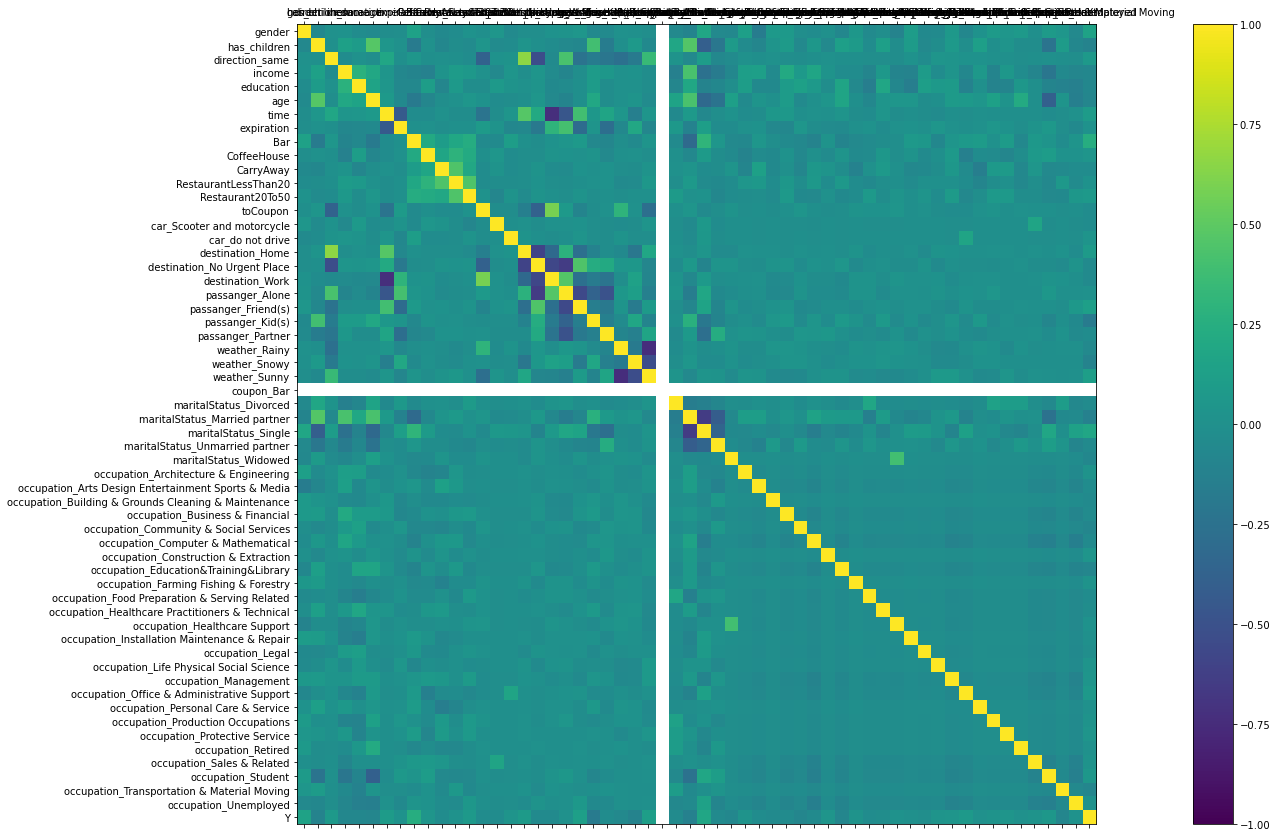

In [22]:
correlations = df.corr(method='pearson')
# plot correlation matrix
fig = pyplot.figure(figsize =(200,50))
ax = fig.add_subplot(353)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names=df1.head()
ticks = np.arange(0,58,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
x2=pyplot.show()

In [26]:
from pandas.plotting import scatter_matrix

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:89: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:90: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


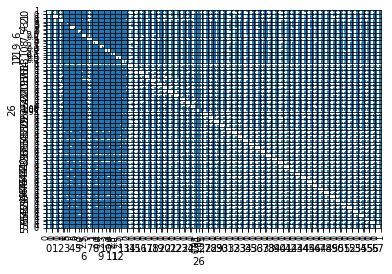

In [27]:
scatter_matrix(df)

pyplot.show()

In [28]:
peek = df.head(20)
print(peek)

     0    1    2    3    4    5    6    7    8    9   ...   48   49   50   51  \
0   1.0  1.0  0.0  6.0  4.0  6.0  1.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
1   1.0  1.0  1.0  6.0  4.0  6.0  3.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
2   1.0  1.0  0.0  6.0  4.0  6.0  0.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
3   1.0  0.0  0.0  1.0  3.0  1.0  1.0  1.0  2.0  1.0  ...  0.0  0.0  0.0  0.0   
4   1.0  0.0  1.0  1.0  3.0  1.0  3.0  1.0  2.0  1.0  ...  0.0  0.0  0.0  0.0   
5   1.0  0.0  0.0  1.0  3.0  1.0  0.0  1.0  2.0  1.0  ...  0.0  0.0  0.0  0.0   
6   1.0  0.0  0.0  4.0  4.0  2.0  1.0  1.0  2.0  4.0  ...  0.0  0.0  0.0  0.0   
7   1.0  0.0  1.0  4.0  4.0  2.0  3.0  1.0  2.0  4.0  ...  0.0  0.0  0.0  0.0   
8   1.0  0.0  0.0  4.0  4.0  2.0  0.0  1.0  2.0  4.0  ...  0.0  0.0  0.0  0.0   
9   1.0  0.0  0.0  3.0  2.0  2.0  1.0  1.0  4.0  4.0  ...  0.0  0.0  0.0  0.0   
10  1.0  0.0  1.0  3.0  2.0  2.0  3.0  1.0  4.0  4.0  ...  0.0  0.0  0.0  0.0   
11  1.0  0.0  0.0  3.0  2.0 

In [29]:
shape = df.shape
print(shape)

(1180, 58)


In [30]:
type = df.dtypes
print(type)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
dtype: object


In [31]:
from pandas import set_option

In [32]:
set_option('display.width', 200)
set_option('display.max_columns', 10)
set_option('precision', 3)

description = df.describe()
print(description)

             0        1         2         3         4   ...        53        54        55        56        57
count  1180.000  1180.00  1180.000  1180.000  1180.000  ...  1180.000  1180.000  1180.000  1180.000  1180.000
mean      0.529     0.36     0.204     4.036     3.201  ...     0.084     0.110     0.023     0.118     0.566
std       0.499     0.48     0.403     2.659     1.269  ...     0.277     0.313     0.150     0.323     0.496
min       0.000     0.00     0.000     0.000     0.000  ...     0.000     0.000     0.000     0.000     0.000
25%       0.000     0.00     0.000     2.000     2.000  ...     0.000     0.000     0.000     0.000     0.000
50%       1.000     0.00     0.000     4.000     4.000  ...     0.000     0.000     0.000     0.000     1.000
75%       1.000     1.00     0.000     6.250     4.000  ...     0.000     0.000     0.000     0.000     1.000
max       1.000     1.00     1.000     8.000     5.000  ...     1.000     1.000     1.000     1.000     1.000

[8 rows x

In [34]:
class_counts = df1.groupby('Y').size()
print(class_counts)


Y
0    512
1    668
dtype: int64


In [35]:
correlations = df.corr(method='pearson')
print(correlations)

           0          1          2      3      4   ...     53     54     55         56     57
0   1.000e+00 -6.983e-02  1.076e-02  0.023 -0.031  ... -0.002  0.094  0.054 -6.059e-02  0.153
1  -6.983e-02  1.000e+00  8.721e-04  0.138  0.096  ... -0.017 -0.230  0.098 -7.702e-02 -0.109
2   1.076e-02  8.721e-04  1.000e+00 -0.028  0.011  ... -0.002  0.003 -0.007 -1.558e-02  0.079
3   2.316e-02  1.378e-01 -2.830e-02  1.000  0.281  ... -0.089 -0.217 -0.053 -7.819e-02 -0.072
4  -3.122e-02  9.551e-02  1.093e-02  0.281  1.000  ... -0.002 -0.101 -0.114 -1.283e-01 -0.073
5  -4.610e-02  4.761e-01 -1.110e-02  0.200  0.160  ... -0.006 -0.383  0.038 -1.384e-01 -0.084
6  -1.868e-02  5.027e-02  1.832e-01  0.045  0.054  ... -0.003 -0.031 -0.015  9.848e-03  0.100
7  -1.139e-02  9.135e-03 -7.378e-03 -0.078 -0.064  ...  0.025  0.067 -0.012 -5.371e-02  0.017
8   1.447e-01 -1.679e-01  4.906e-02 -0.095 -0.068  ...  0.066  0.039 -0.029  3.620e-02  0.246
9  -1.190e-02  1.517e-02 -4.340e-03 -0.118  0.116  ...  0.07

In [36]:
skew = df.skew()
print(skew)

0     -0.116
1      0.583
2      1.469
3      0.192
4     -0.184
5      0.638
6     -0.044
7     -1.310
8      0.996
9      0.209
10    -0.056
11     0.097
12     0.700
13     0.152
14    19.782
15    24.259
16     1.188
17    -0.088
18     1.264
19    -0.344
20     1.671
21     2.928
22     1.982
23     1.443
24     2.387
25    -0.750
26     0.000
27     5.641
28     0.285
29     0.599
30     1.663
31    15.284
32     7.304
33     4.016
34    12.884
35     3.835
36     5.830
37     2.325
38    12.884
39     3.612
40    15.284
41     5.733
42     6.038
43     5.830
44     9.028
45     6.960
46     8.161
47     3.266
48     3.870
49    10.225
50     7.920
51     7.920
52     7.920
53     3.006
54     2.493
55     6.390
56     2.374
57    -0.267
dtype: float64


In [37]:
skew.to_csv('Skew2_Bar_Wn.csv', index=False)

In [38]:
correlations.to_csv('correlations2_Bar_Wn.csv', index=False)

In [39]:
description.to_csv('description_Bar_Wn.csv', index=False)

# Random Forest Tree

In [40]:
from sklearn.tree import export_graphviz

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

<Figure size 14400x11520 with 0 Axes>

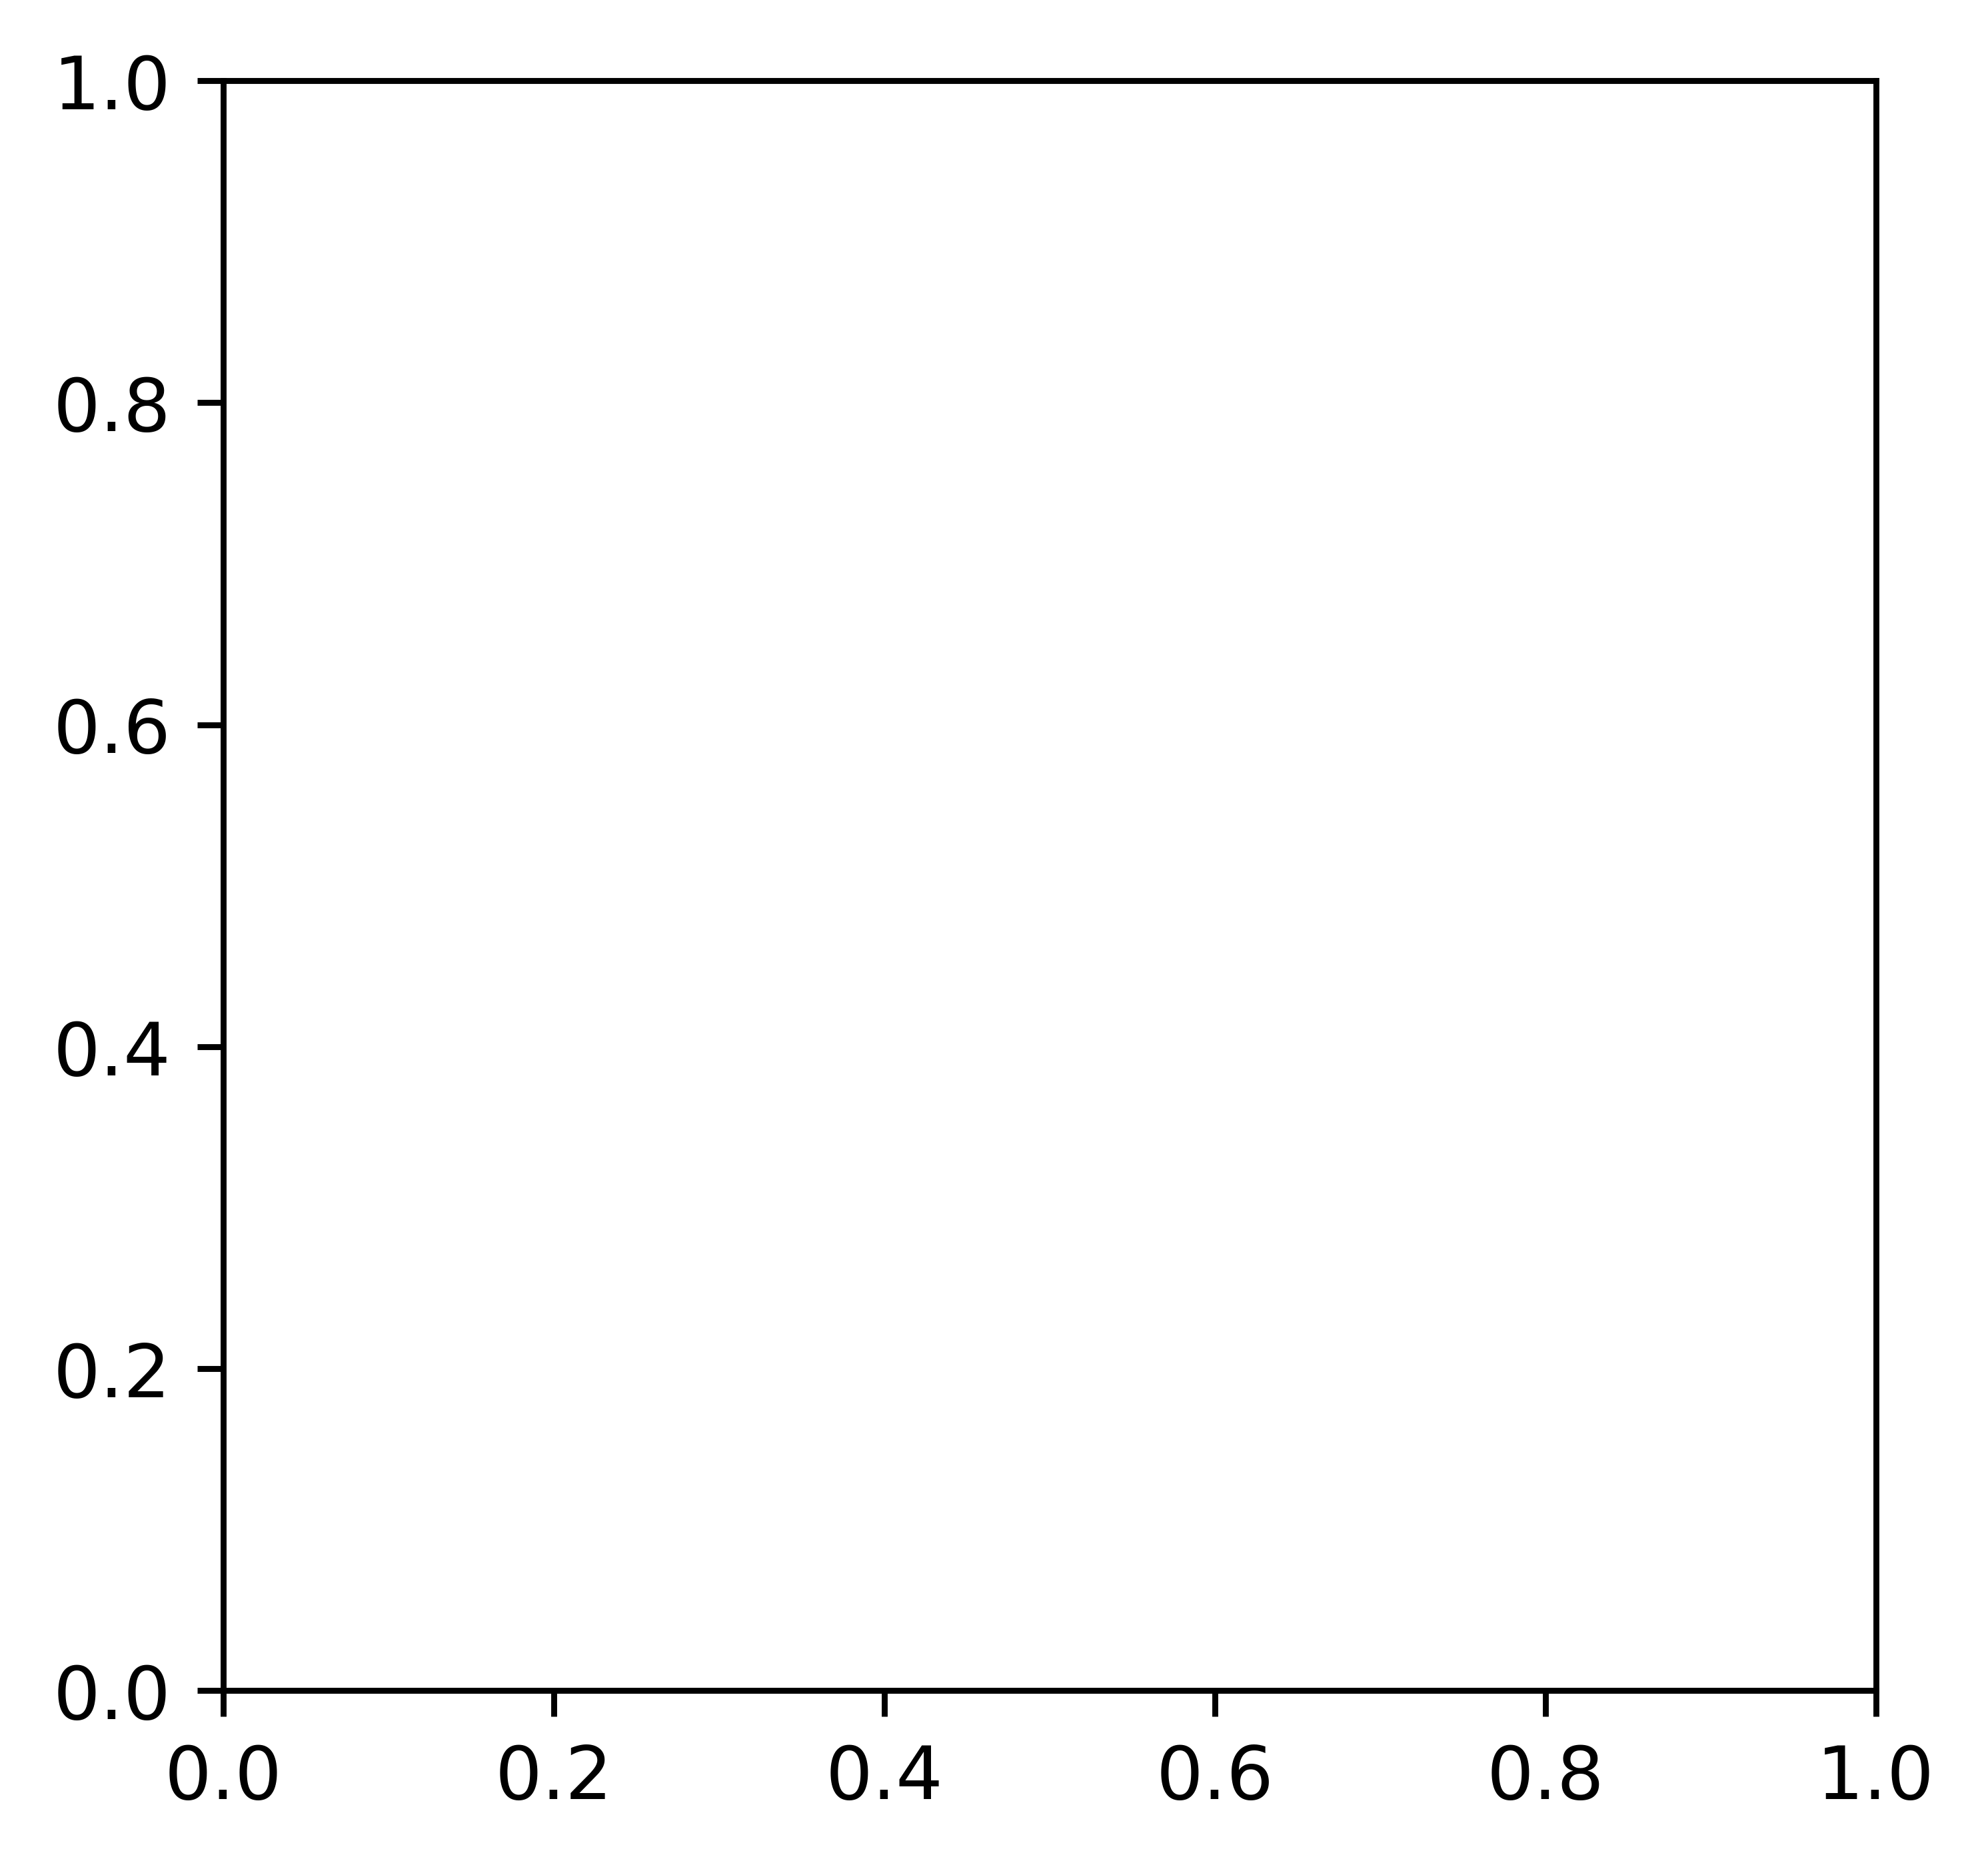

In [41]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(200,160))
fn=np.array(X1.columns)
cn=str(y1)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree_Bar_Wn.png')